In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
import io

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.00,160,5500,16,22,?


In [4]:
data = data[data.horsepower != '?']
data = data[data.price != '?']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199 entries, 0 to 204
Data columns (total 26 columns):
symboling            199 non-null int64
normalized-losses    199 non-null object
make                 199 non-null object
fuel-type            199 non-null object
aspiration           199 non-null object
num-of-doors         199 non-null object
body-style           199 non-null object
drive-wheels         199 non-null object
engine-location      199 non-null object
wheel-base           199 non-null float64
length               199 non-null float64
width                199 non-null float64
height               199 non-null float64
curb-weight          199 non-null int64
engine-type          199 non-null object
num-of-cylinders     199 non-null object
engine-size          199 non-null int64
fuel-system          199 non-null object
bore                 199 non-null object
stroke               199 non-null object
compression-ratio    199 non-null float64
horsepower           199 non-nul

In [6]:
data["price"] = pd.to_numeric(data.price)
data["horsepower"] = pd.to_numeric(data["horsepower"])

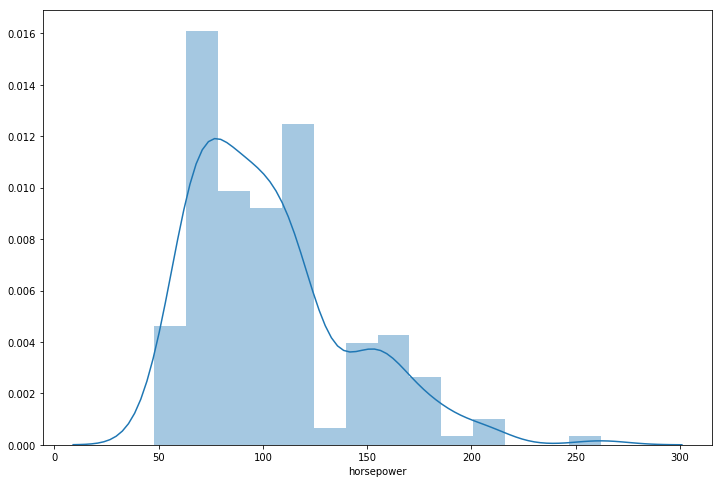

In [7]:
plt.figure(figsize=(12,8))
sb.distplot(data.horsepower)

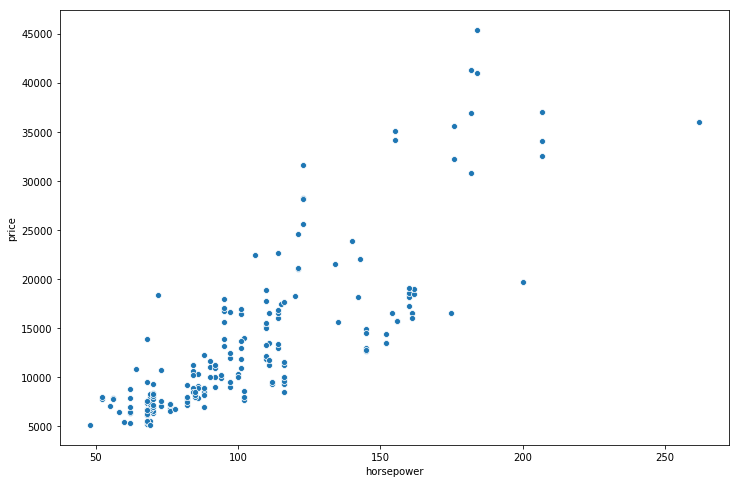

In [8]:
plt.figure(figsize=(12,8))
sb.scatterplot(data=data, x="horsepower", y="price")

In [9]:
def predict(X, theta):
  return X.dot(theta)

In [10]:
def cost_function(X, Y, theta):
  return np.sum((X.dot(theta) - Y) ** 2)/(2 * len(Y))

In [11]:
def descend(X, Y, theta, alpha):
  return theta - alpha * X.T.dot(predict(X, theta) - Y) / len(Y)

In [12]:
def gradient_descent(X,y,theta, alpha=0.00001, iterations=1000):
    cost_hist, t0_hist, t1_hist = [cost_function(X,y,theta)], [theta[0,0]], [theta[1,0]]

    for i in range(iterations):
        theta = descend(X, y, theta, alpha)

        cost_hist.append(cost_function(X,y,theta))
        t0_hist.append(theta[0,0])
        t1_hist.append(theta[1,0])       

    return theta.reshape(-1), cost_hist, t0_hist, t1_hist

In [13]:
def plot_linreg(X, theta):
  plt.figure(figsize=(12, 8))
  x = np.arange(min(X[:,0]),max(X[:,0])).reshape(-1,1)
  sb.scatterplot(data=data, x="horsepower", y="price")
  y_pred = predict(np.hstack((x, np.ones(len(x)).reshape(-1,1))), theta)
  x = x.reshape(-1)
  sb.lineplot(x, y_pred, color="orange")

In [14]:
def plot_surface(x, y, theta, cost_history, t0_hist, t1_hist):
  T0, T1 = np.meshgrid(np.linspace(-4000,3000,100),np.linspace(-100000,100000,100))
  zs = np.array([cost_function(x, y.reshape(-1,1),np.array([t0,t1]).reshape(-1,1)) 
                       for t0, t1 in zip(np.ravel(T0), np.ravel(T1))])  
  Z = zs.reshape(T0.shape)

  print("Hypotese: y = " + str(np.round(t0_hist[-1],2)) + "*x + " + str(np.round(t1_hist[-1], 2)))
  print("Mean absolute error(MAE):", mae(predict(x, theta), y))

  anglesx = np.array(t0_hist)[1:] - np.array(t0_hist)[:-1]
  anglesy = np.array(t1_hist)[1:] - np.array(t1_hist)[:-1]

  fig = plt.figure(figsize = (16,8))

  ax = fig.add_subplot(1, 1, 1, projection='3d')
  ax.plot_surface(T0, T1, Z, rstride = 5, cstride = 5, cmap = 'jet', alpha=0.5)
  ax.plot(t0_hist[:i],t1_hist[:i], cost_history[:i], marker = '*', color = 'r', alpha = .4, label = 'Gradient descent')

  ax.set_xlabel('Theta_1')
  ax.set_ylabel('Theta_0')
  ax.set_zlabel('Kostfunksjon')
  ax.view_init(25, 60)

In [15]:
x = data.horsepower.values.reshape(-1,1)
x = np.hstack((x, np.ones(len(x)).reshape(-1,1)))

y = data.price.values.reshape(-1)

In [16]:
y[:10]

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       16430], dtype=int64)

In [67]:
theta_init = np.array([-5000, -5000])

In [66]:
theta_init

array([-5000, -5000])

In [19]:
predict(x, theta_init)[:10]

array([-560000., -560000., -775000., -515000., -580000., -555000.,
       -555000., -555000., -705000., -510000.])

In [151]:
i = 2
alpha = 0.00001

theta, cost_history, t0_hist, t1_hist = gradient_descent(x,y.reshape(-1,1), theta_init.reshape(-1,1), alpha=alpha, iterations=i)

Hypotese: y = -3823.74*x + -4989.94
Mean absolute error(MAE): 413596.565706441


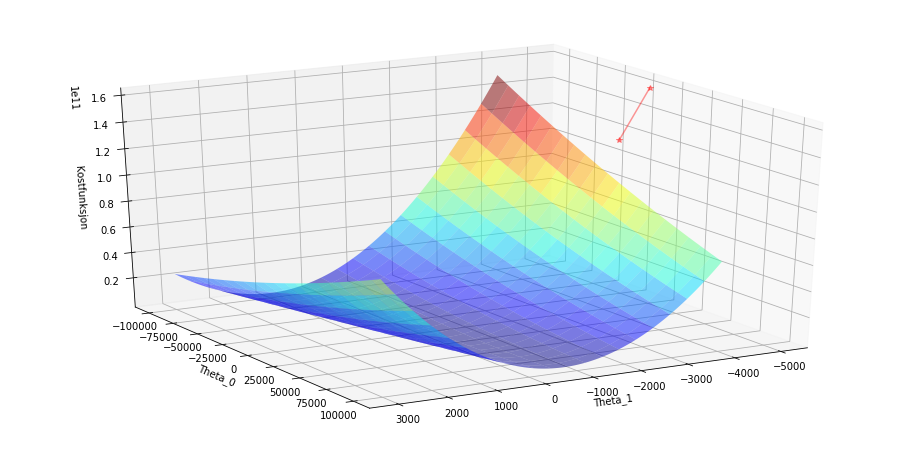

In [152]:
plot_surface(x, y, theta, cost_history, t0_hist, t1_hist)

Mean absolute error (MAE): 147492.89291786673


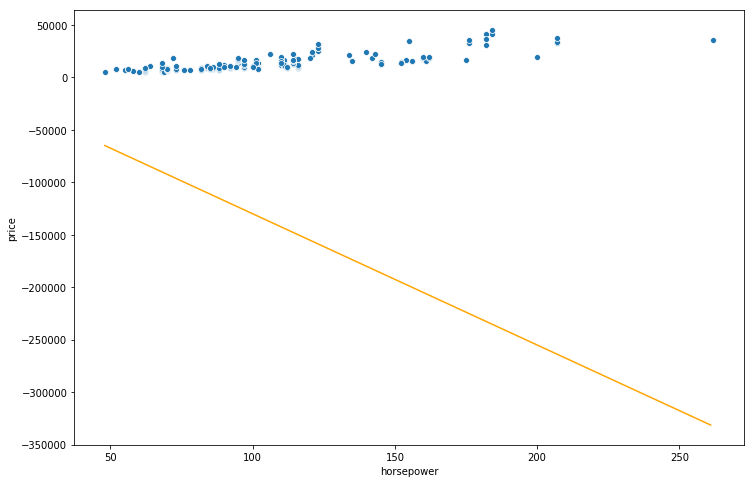

In [23]:
plot_linreg(x, theta)
print("Mean absolute error (MAE):", mae(predict(x, theta), y))

In [24]:
features = ["horsepower", "engine-size", "compression-ratio", "city-mpg", "highway-mpg", "curb-weight", "height", "width", "length", "wheel-base"]

In [25]:
data[features].head()

,horsepower,engine-size,compression-ratio,city-mpg,highway-mpg,curb-weight,height,width,length,wheel-base
0,111,130,9.0,21,27,2548,48.8,64.1,168.8,88.6
1,111,130,9.0,21,27,2548,48.8,64.1,168.8,88.6
2,154,152,9.0,19,26,2823,52.4,65.5,171.2,94.5
3,102,109,10.0,24,30,2337,54.3,66.2,176.6,99.8
4,115,136,8.0,18,22,2824,54.3,66.4,176.6,99.4


In [26]:
X = data[features].values

In [27]:
X[:10]

array([[ 111. ,  130. ,    9. ,   21. ,   27. , 2548. ,   48.8,   64.1,
         168.8,   88.6],
       [ 111. ,  130. ,    9. ,   21. ,   27. , 2548. ,   48.8,   64.1,
         168.8,   88.6],
       [ 154. ,  152. ,    9. ,   19. ,   26. , 2823. ,   52.4,   65.5,
         171.2,   94.5],
       [ 102. ,  109. ,   10. ,   24. ,   30. , 2337. ,   54.3,   66.2,
         176.6,   99.8],
       [ 115. ,  136. ,    8. ,   18. ,   22. , 2824. ,   54.3,   66.4,
         176.6,   99.4],
       [ 110. ,  136. ,    8.5,   19. ,   25. , 2507. ,   53.1,   66.3,
         177.3,   99.8],
       [ 110. ,  136. ,    8.5,   19. ,   25. , 2844. ,   55.7,   71.4,
         192.7,  105.8],
       [ 110. ,  136. ,    8.5,   19. ,   25. , 2954. ,   55.7,   71.4,
         192.7,  105.8],
       [ 140. ,  131. ,    8.3,   17. ,   20. , 3086. ,   55.9,   71.4,
         192.7,  105.8],
       [ 101. ,  108. ,    8.8,   23. ,   29. , 2395. ,   54.3,   64.8,
         176.8,  101.2]])

In [28]:
y[:10]

array([13495, 16500, 16500, 13950, 17450, 15250, 17710, 18920, 23875,
       16430], dtype=int64)

In [29]:
model = LinearRegression()

In [30]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.coef_, model.intercept_

(array([ 6.31894531e+01,  8.98499894e+01,  2.30919417e+02, -3.45017305e+02,
         2.03012646e+02,  5.00519255e-01,  2.61165358e+02,  7.18584521e+02,
        -9.91942361e+01,  5.82999978e+01]), -55722.644928981535)

Mean absolute error (MAE): 2395.436650517186


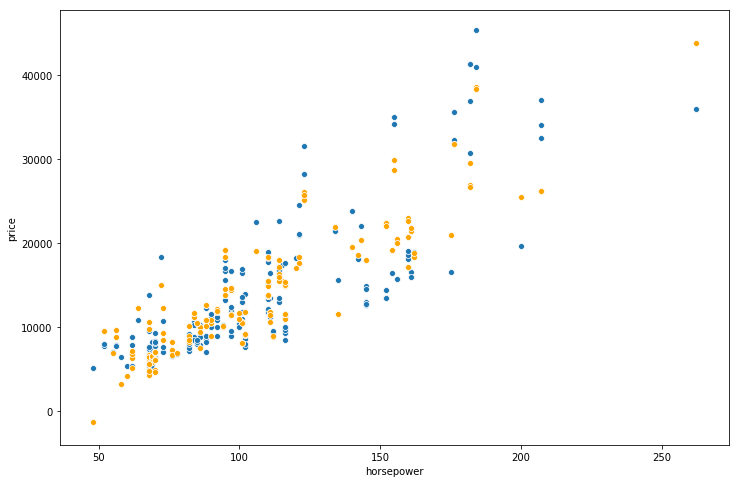

In [32]:
plt.figure(figsize=(12, 8))
predictions = model.predict(X)
sb.scatterplot(data=data, x="horsepower", y="price")
sb.scatterplot(X[:,0], predictions, color="orange")
print("Mean absolute error (MAE):", mae(predictions, y))